# Kendal correlation between levels

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

## Misc functions

In [2]:
MAX_V_VALUE = 4158

def select_max_k(df):
    df.groupby(['node','s'], sort=False)['k'].max()
    idx = df.groupby(['node','s'])['k'].transform(max) == df['k']
    df_k_max = df[idx][['node','number_influenced','s']]
    return df_k_max

def generate_pivot_df(df_k_max):
    pivot_df = []

    for n in df_k_max['node'].unique():
        df_nodes = df_k_max.loc[df_k_max['node'] == n]
        df_nodes = df_nodes.set_index('node', drop=True)
        pivot_df.append(df_nodes.pivot_table(values='number_influenced',
                                             index=df_nodes.index,
                                             columns='s').reset_index(drop=True))
    df_to_corr = pd.concat(pivot_df)
    
    return df_to_corr

## Plurality

In [3]:
df = pd.read_csv('parallel_merge_plurality.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,0,24587,26,2
3,1,24587,41,2
4,2,24587,42,2


In [4]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,24587,1,0
1,24587,2,1
4,24587,42,2
7,24587,206,3
15,24587,1054,4


In [5]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [6]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,2.0,42.0,206.0,1054.0,2596.0,3632.0,4015.0,4116.0,4152.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,4.0,17.0,72.0,355.0,1515.0,3016.0,3772.0,4066.0,4142.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,9.0,33.0,290.0,1306.0,2943.0,3783.0,4061.0,4128.0,4152.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,2.0,11.0,35.0,130.0,731.0,2136.0,3412.0,3970.0,4114.0,4145.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,2.0,11.0,32.0,64.0,221.0,957.0,2506.0,3560.0,3948.0,4079.0,4132.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0


In [7]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.184046,0.126698,0.124208,0.125315,0.127051,0.127378,0.129272,0.130251,0.130093,0.117204,0.069306,0.033604,-0.008080,-0.004919,0.003109,0.005585,NaN
1,0.184046,1.000000,0.556603,0.445083,0.416144,0.413999,0.408679,0.408963,0.397588,0.378089,0.344377,0.288095,0.205425,0.118307,0.078553,0.050879,0.020791,NaN
2,0.126698,0.556603,1.000000,0.778107,0.719382,0.706976,0.703058,0.696259,0.671291,0.640029,0.595053,0.486051,0.326467,0.181710,0.113958,0.062098,0.021892,NaN
3,0.124208,0.445083,0.778107,1.000000,0.887703,0.859127,0.852662,0.840121,0.805026,0.756398,0.709815,0.580106,0.373539,0.203042,0.126977,0.066844,0.021784,NaN
4,0.125315,0.416144,0.719382,0.887703,1.000000,0.933085,0.920183,0.900645,0.858316,0.804996,0.745848,0.613655,0.392026,0.210015,0.131798,0.068779,0.021908,NaN
5,0.127051,0.413999,0.706976,0.859127,0.933085,1.000000,0.953418,0.929413,0.875631,0.823997,0.758626,0.622867,0.398725,0.211472,0.132641,0.069131,0.021941,NaN
6,0.127378,0.408679,0.703058,0.852662,0.920183,0.953418,1.000000,0.935453,0.881965,0.826292,0.762536,0.625103,0.401039,0.211906,0.132748,0.069280,0.021943,NaN
7,0.129272,0.408963,0.696259,0.840121,0.900645,0.929413,0.935453,1.000000,0.901709,0.835752,0.761499,0.624792,0.402085,0.212349,0.132842,0.069350,0.021955,NaN
8,0.130251,0.397588,0.671291,0.805026,0.858316,0.875631,0.881965,0.901709,1.000000,0.873077,0.775394,0.628279,0.402393,0.212769,0.133077,0.069470,0.021993,NaN


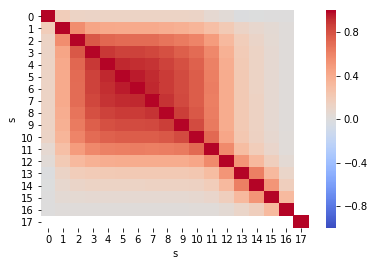

In [8]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Min

In [9]:
df = pd.read_csv('parallel_merge_min.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24589,1,0
1,1,24589,5,0
2,2,24589,23,0
3,3,24589,97,0
4,4,24589,451,0


In [10]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
11,24589,4158,0
22,24589,4158,1
32,24589,4158,2
41,24589,4158,3
49,24589,4158,4


In [11]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [12]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0


In [13]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


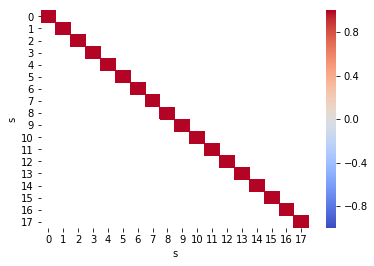

In [14]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Max

In [15]:
df = pd.read_csv('parallel_merge_max.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,0,24587,26,2
3,1,24587,40,2
4,0,24587,145,3


In [16]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,24587,1,0
1,24587,2,1
3,24587,40,2
5,24587,197,3
7,24587,913,4


In [17]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [18]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,2.0,40.0,197.0,913.0,2353.0,3570.0,4000.0,4116.0,4152.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,9.0,35.0,216.0,904.0,2227.0,3422.0,3941.0,4085.0,4132.0,4154.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,2.0,23.0,85.0,286.0,956.0,2438.0,3575.0,3994.0,4121.0,4150.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,3.0,17.0,83.0,400.0,1512.0,3096.0,3824.0,4048.0,4121.0,4150.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,3.0,11.0,49.0,216.0,1038.0,2530.0,3549.0,3988.0,4096.0,4145.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0


In [19]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.195033,0.129768,0.124484,0.125589,0.126918,0.127170,0.128802,0.130239,0.130031,0.117213,0.069306,0.033604,-0.008080,-0.004919,0.003109,0.005585,NaN
1,0.195033,1.000000,0.565683,0.450307,0.420896,0.417677,0.414307,0.411750,0.402433,0.383866,0.351589,0.291863,0.201718,0.118139,0.078650,0.050498,0.020861,NaN
2,0.129768,0.565683,1.000000,0.787004,0.726165,0.711320,0.708006,0.701414,0.675056,0.645238,0.599816,0.491425,0.325545,0.181249,0.114311,0.061909,0.021899,NaN
3,0.124484,0.450307,0.787004,1.000000,0.897198,0.863045,0.854715,0.844582,0.806382,0.758295,0.712476,0.582219,0.375243,0.203202,0.126914,0.067095,0.021785,NaN
4,0.125589,0.420896,0.726165,0.897198,1.000000,0.940009,0.921111,0.905393,0.860542,0.804100,0.746777,0.614931,0.392552,0.210248,0.131778,0.068772,0.021908,NaN
5,0.126918,0.417677,0.711320,0.863045,0.940009,1.000000,0.959816,0.933996,0.879730,0.822506,0.756382,0.622404,0.398989,0.211482,0.132655,0.069131,0.021941,NaN
6,0.127170,0.414307,0.708006,0.854715,0.921111,0.959816,1.000000,0.944826,0.886195,0.826617,0.760954,0.623282,0.400907,0.211948,0.132754,0.069277,0.021943,NaN
7,0.128802,0.411750,0.701414,0.844582,0.905393,0.933996,0.944826,1.000000,0.904760,0.834786,0.763102,0.625145,0.401699,0.212324,0.132822,0.069344,0.021953,NaN
8,0.130239,0.402433,0.675056,0.806382,0.860542,0.879730,0.886195,0.904760,1.000000,0.872613,0.773542,0.628485,0.402528,0.212729,0.133088,0.069464,0.021991,NaN


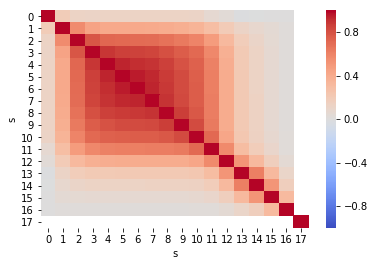

In [20]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Random

In [21]:
df = pd.read_csv('parallel_merge_random_2_arxv.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,24587,1,0
1,0,24587,2,1
2,1,24587,5,1
3,2,24587,7,1
4,0,24587,26,2


In [22]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,24587,1,0
3,24587,7,1
7,24587,50,2
21,24587,380,3
32,24587,1345,4


In [23]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [24]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,7.0,50.0,380.0,1345.0,2698.0,3638.0,4008.0,4123.0,4149.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,11.0,40.0,102.0,524.0,1467.0,2753.0,3664.0,3996.0,4108.0,4143.0,4155.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,12.0,32.0,176.0,781.0,1985.0,3150.0,3854.0,4079.0,4143.0,4156.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,4.0,30.0,94.0,289.0,1073.0,2435.0,3439.0,3925.0,4103.0,4145.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0
0,1.0,3.0,19.0,63.0,441.0,1486.0,2718.0,3645.0,3991.0,4104.0,4144.0,4157.0,4158.0,4158.0,4158.0,4158.0,4158.0,4158.0


In [25]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.230808,0.136456,0.118326,0.118148,0.120039,0.122256,0.117360,0.114459,0.107578,0.090577,0.044327,0.035511,0.016536,0.009319,-0.017041,-0.018019,NaN
1,0.230808,1.000000,0.573741,0.501603,0.489289,0.479519,0.481547,0.475634,0.454520,0.435283,0.411505,0.334991,0.245315,0.145784,0.091335,0.054244,0.018044,NaN
2,0.136456,0.573741,1.000000,0.771807,0.745374,0.728576,0.725218,0.721253,0.688078,0.655523,0.610837,0.519179,0.351095,0.200177,0.127284,0.065510,0.021920,NaN
3,0.118326,0.501603,0.771807,1.000000,0.890848,0.873847,0.862172,0.851218,0.812971,0.761550,0.716222,0.599237,0.390150,0.212523,0.133935,0.067817,0.021912,NaN
4,0.118148,0.489289,0.745374,0.890848,1.000000,0.946522,0.933185,0.912194,0.862147,0.813862,0.755853,0.632587,0.408069,0.218159,0.137010,0.068793,0.021906,NaN
5,0.120039,0.479519,0.728576,0.873847,0.946522,1.000000,0.961083,0.935556,0.880630,0.827704,0.768270,0.640964,0.414370,0.219749,0.137737,0.069145,0.021851,NaN
6,0.122256,0.481547,0.725218,0.862172,0.933185,0.961083,1.000000,0.942009,0.887462,0.834534,0.771267,0.642834,0.415944,0.220457,0.137913,0.069264,0.021943,NaN
7,0.117360,0.475634,0.721253,0.851218,0.912194,0.935556,0.942009,1.000000,0.905961,0.844811,0.770718,0.644225,0.416910,0.220731,0.138102,0.069339,0.021955,NaN
8,0.114459,0.454520,0.688078,0.812971,0.862147,0.880630,0.887462,0.905961,1.000000,0.880262,0.794411,0.646392,0.417749,0.221140,0.138345,0.069460,0.021994,NaN


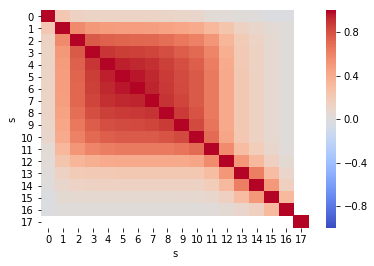

In [26]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')